In [108]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf

In [45]:
data=pd.read_excel(r"D:\Jupyter notebook\125156003-Time_Series\Ex_10\Air Passenger.xlsx")

In [46]:
data.dropna(axis=1,inplace=True)

In [47]:
data.rename(columns={"Passengers":"Monthly","Unnamed: 2":"Passengers"},inplace=True)

<AxesSubplot:>

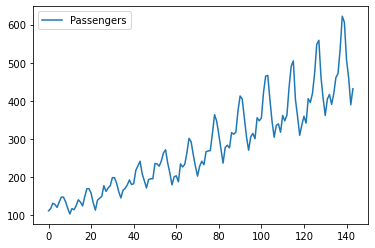

In [67]:
data[["Monthly","Passengers"]].plot()

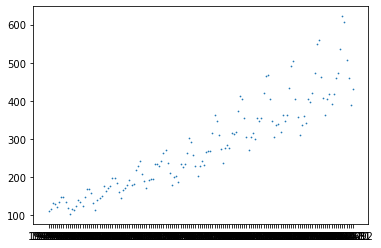

In [64]:
plt.scatter(x=data["Monthly"],y=data["Passengers"],s=0.5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

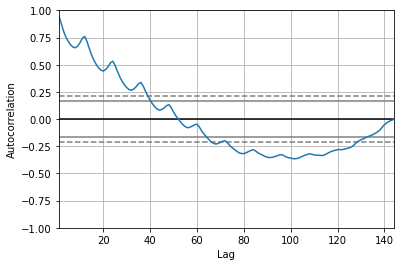

In [73]:
autocorrelation_plot(data["Passengers"])

In [77]:
model=sm.tsa.statespace.SARIMAX(data["Passengers"],order=(2,1,2),seasonal_order=(2,1,2,12))

In [79]:
model.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -498.350
Date:                            Thu, 21 Mar 2024   AIC                           1014.701
Time:                                    14:24:31   BIC                           1040.578
Sample:                                         0   HQIC                          1025.216
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6636      0.400      1.658      0.097      -0.121       1.448
ar.L2          0.1903      0.327      0.581      0.561      -0.452       0.832
ma.L1         -1.1144      0.377     -2.953      0.003      -1.854      -0.375
ma.L2          0.1237      0.372      0.332      0.740      -0.605       0.853
ar.S.L12       1.3547      0.421      3.216      0.001       0.529       2.180
ar.S.L24      -0.4156      0.511     -0.814      0.416      -1.417       0.585
ma.S.L12      -1.6538      0.580     -2.852      0.004      -2.790      -0.517
ma.S.L24       0.8075      0.707      1.143      0.253      -0.578       2.193
sigma2       104.2356     28.455      3.663      0.000      48.464     160.007
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                14.74
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               2.60   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
data["forecast"]=model.fit().predict(start=0,end=len(data)-1)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


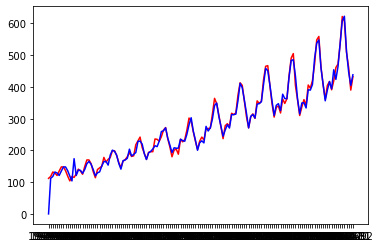

In [101]:
plt.plot(data["Monthly"],data["Passengers"],color="red")
plt.plot(data["Monthly"],data["forecast"],color="blue")
plt.show()

In [102]:
def eval_model(pred,actual):
    return np.sqrt(mean_squared_error(pred,actual))

In [103]:
print("RMSE :",eval_model(data["forecast"],data["Passengers"]))

RMSE : 15.030137223158842


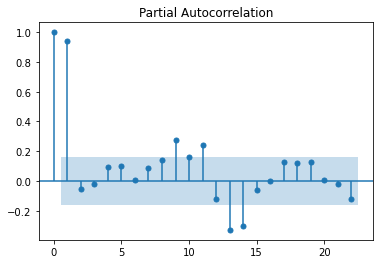

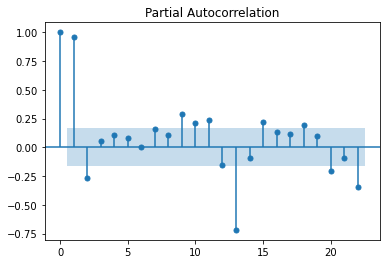

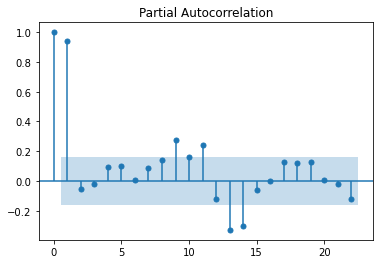

In [109]:
plot_pacf(data["Passengers"])
plot_pacf(data["forecast"])

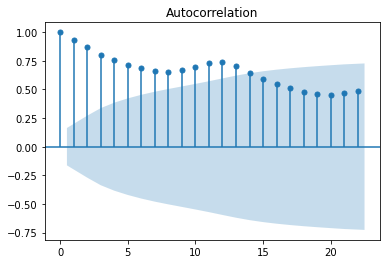

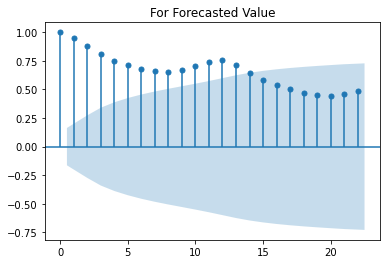

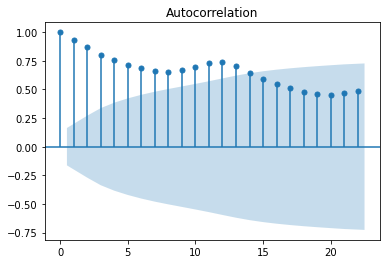

In [111]:
plot_acf(data["Passengers"])
plt.title("For Forecasted Value")
plot_acf(data["forecast"])